In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_train.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_xyz = data_train.class_names

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path, image_size=(img_height,img_width), batch_size=32, shuffle=False, validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


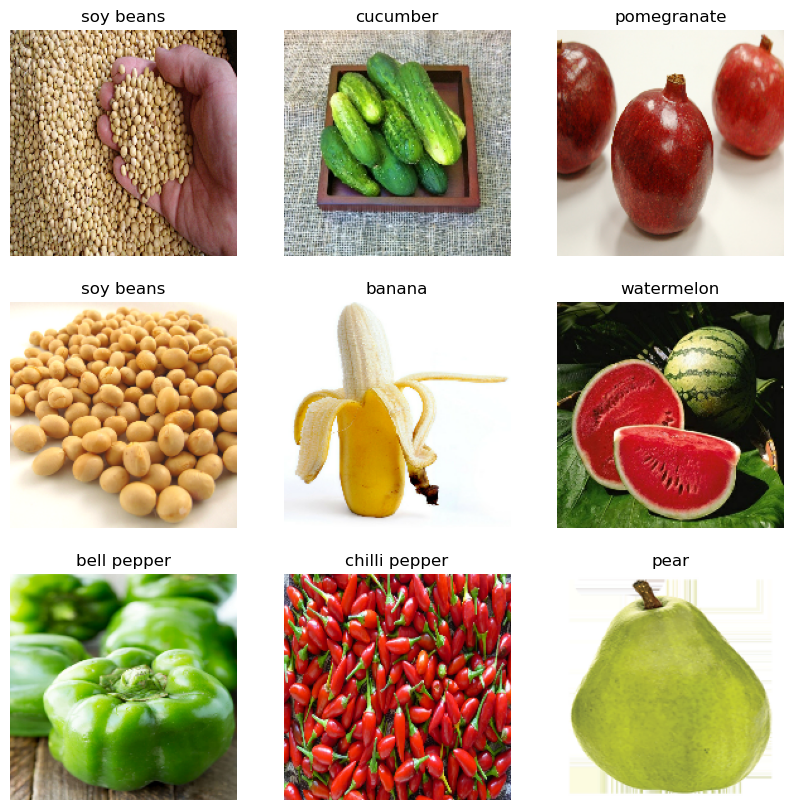

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_xyz[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_xyz))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 476ms/step - accuracy: 0.5799 - loss: 1.5080 - val_accuracy: 0.8319 - val_loss: 0.7466
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 480ms/step - accuracy: 0.7366 - loss: 0.9457 - val_accuracy: 0.8917 - val_loss: 0.5655
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 561ms/step - accuracy: 0.8763 - loss: 0.4622 - val_accuracy: 0.9402 - val_loss: 0.4740
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 684ms/step - accuracy: 0.9424 - loss: 0.2465 - val_accuracy: 0.9430 - val_loss: 0.5037
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 662ms/step - accuracy: 0.9628 - loss: 0.1736 - val_accuracy: 0.9316 - val_loss: 0.5471
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 516ms/step - accuracy: 0.9637 - loss: 0.1699 - val_accuracy: 0.9487 - val_loss: 0.4947
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.9685 - loss: 0.1619 - val_accuracy: 0.9459 - val_loss: 0.5689
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 457ms/step - accuracy: 0.9658 - loss: 0.1747 - val_accu

Text(0.5, 1.0, 'Loss')

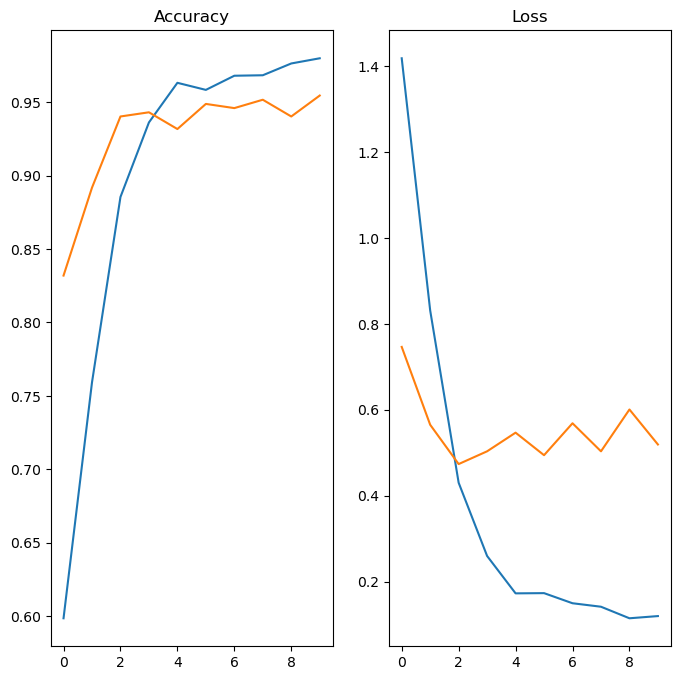

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [17]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [18]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [19]:
score = tf.nn.softmax(predict)

In [20]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_xyz[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 100.00


In [22]:
model.save('Image_classify.keras')